# LLTDREK example

In [35]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from src import (
    Wing,
    FlightCondition,
    WingPool,
    Simulation,
    PostProcessing,
    load_folder
)

## Load airfoils

In [36]:
airfoils_data, _ = load_folder("../sample_airfoils")
print(airfoils_data)

{'NACA4424': {'3E6': {'cl_list': array([[-12.5  ,  -0.775],
       [-10.5  ,  -0.593],
       [ -8.4  ,  -0.449],
       [ -6.5  ,  -0.227],
       [ -4.5  ,  -0.054],
       [ -2.4  ,   0.148],
       [ -0.5  ,   0.346],
       [  1.4  ,   0.548],
       [  3.3  ,   0.736],
       [  5.4  ,   0.874],
       [  7.7  ,   1.022],
       [  8.7  ,   1.111],
       [  9.7  ,   1.17 ],
       [ 11.9  ,   1.24 ],
       [ 13.8  ,   1.269],
       [ 17.9  ,   1.22 ],
       [ 22.2  ,   1.22 ],
       [ 20.2  ,   1.21 ]]), 'cl_alpha': 0.0739701222272521, 'cl0': 0.4658329560887278, 'cm0': -0.2942, 'clmax': 1.269}, '6E6': {'cl_list': array([[-16.4  ,  -0.825],
       [-14.4  ,  -0.854],
       [-12.5  ,  -0.825],
       [-10.7  ,  -0.627],
       [ -6.4  ,  -0.262],
       [ -4.5  ,  -0.044],
       [ -2.7  ,   0.153],
       [ -0.4  ,   0.351],
       [  1.4  ,   0.548],
       [  3.5  ,   0.736],
       [  8.   ,   1.062],
       [ 10.9  ,   1.22 ],
       [ 11.9  ,   1.289],
       [ 14.9  , 

## Create wing

In [37]:
wing = Wing(
    spans = [1, 0.5],
    chords = [1, 0.5, 0.4],
    offsets = [0, 0.125, 0.025],
    twist_angles = [0, 0, 0],
    dihedral_angles= [0, 0, 0],
    airfoils = ["NACA4412", "NACA4412", "NACA4412"],
    surface_name="wing",
    N_panels=12,
    distribution_type="cosine",
    sweep_check=False
)
wing.generate_mesh() # Generate wing simulation elements

## Create flight condition

In [38]:
flight_condition = FlightCondition(
    V_inf = 20,
    nu = 1.5e-5,
    rho = 1.225,
    angles_of_attack = [i for i in range(15)],
    h = 0,
    ground_effect_check = False,
    angular_velocity=[0, 0, 0]
)
wing.setup_airfoil_data(flight_condition, airfoils_data)  # Assign airfoil data to wing

## Setup simulation

In [39]:
# Link wing that will be simulated with flight condition
wing_pool = WingPool(
    wing_list = [wing],
    flight_condition = flight_condition,
    moment_ref=[0, 0, 0]
)

simulation = Simulation(
    damping_factor = 0.4,
    max_iter = 100,
    max_residual = 1e-4,
    linear_check = False,
    show_logs = True,
    simulation_mode = "latest_solution" # Solves linear version of equations before doing non linear simulation to speed up process
)

# Run simulation

simulation_results = simulation.run(wing_pool)

Running simulation for angles between 0 and 14
Linear simulation check: False
Found solution for angle 0
number of iterations: 20
Found solution for angle 1
number of iterations: 15
Found solution for angle 2
number of iterations: 15
Found solution for angle 3
number of iterations: 15
Found solution for angle 4
number of iterations: 15
Found solution for angle 5
number of iterations: 15
Found solution for angle 6
number of iterations: 15
Found solution for angle 7
number of iterations: 15
Found solution for angle 8
number of iterations: 14
Found solution for angle 9
number of iterations: 14
Found solution for angle 10
number of iterations: 14
Found solution for angle 11
number of iterations: 13
Found solution for angle 12
number of iterations: 14
Reached max iterations for angle 13
Found solution for angle 14
number of iterations: 50


## Post Process simulation and get Aerodynamic Coefficients

Text(0.5, 0, 'Angle of attack')

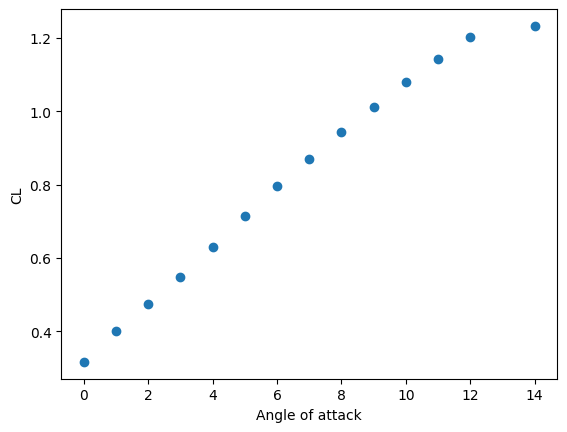

In [40]:
import matplotlib.pyplot as plt

post_processing = PostProcessing()
coefficients = post_processing.get_coefficients(wing_pool, simulation_results)

CL_list = []
CM_list = []
CD_list = []

for coef in coefficients:
    CL_list.append(coef.global_coefficients.forces[2])
    CM_list.append(coef.global_coefficients.moments[1])
    CD_list.append(coef.global_coefficients.forces[0])


plt.scatter(flight_condition.angles_of_attack, CL_list)
plt.ylabel("CL")
plt.xlabel("Angle of attack")